### Bank Marketing Data Set
Output: we have to predict if the client will subscribe a term deposit or not

In [1]:
#Packages
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 
from pylab import plot, show
%matplotlib inline

In [2]:
#current directory
!pwd

/home/kunal/Documents/Data_Science_Practice/ipynb_file


In [3]:
#Reading the csv files
bank_additional_full_df=pd.read_csv('../data/bank-additional/bank-additional-full.csv',sep=';')
bank_additional_df=pd.read_csv('../data/bank-additional/bank-additional.csv',sep=';')
bank_full_df=pd.read_csv('../data/bank/bank-full.csv',sep=';')
bank_df=pd.read_csv('../data/bank/bank.csv',sep=';')

#### Analysing Bank Additional Full file

In [4]:
#Columns information
bank_additional_full_df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [5]:
#size
bank_additional_full_df.shape

(41188, 21)

In [6]:
#Info
bank_additional_full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [7]:
#Describe
bank_additional_full_df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [8]:
#Getting first five rows
bank_additional_full_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [9]:
#Checking for null value
bank_additional_full_df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

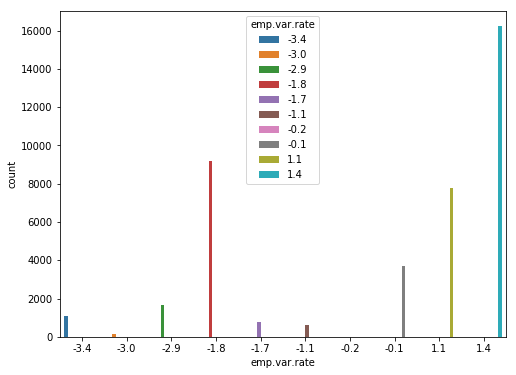

In [10]:
#plotting employment variation rate - quarterly indicator emp.var.rate
plt.rcParams['figure.figsize'] = (8, 6)
sns.countplot(x='emp.var.rate', hue='emp.var.rate', data=bank_additional_full_df);

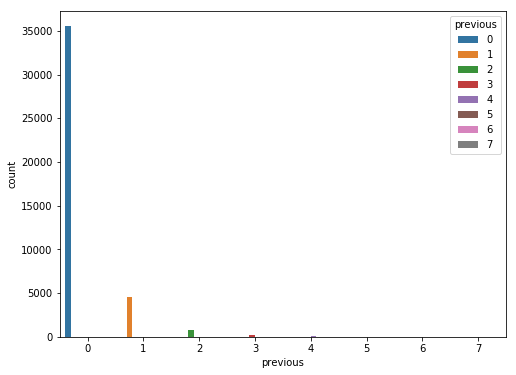

In [11]:
#previous: number of contacts performed before this campaign and for this client (numeric)
plt.rcParams['figure.figsize'] = (8, 6)
sns.countplot(x='previous',hue='previous',data=bank_additional_full_df);

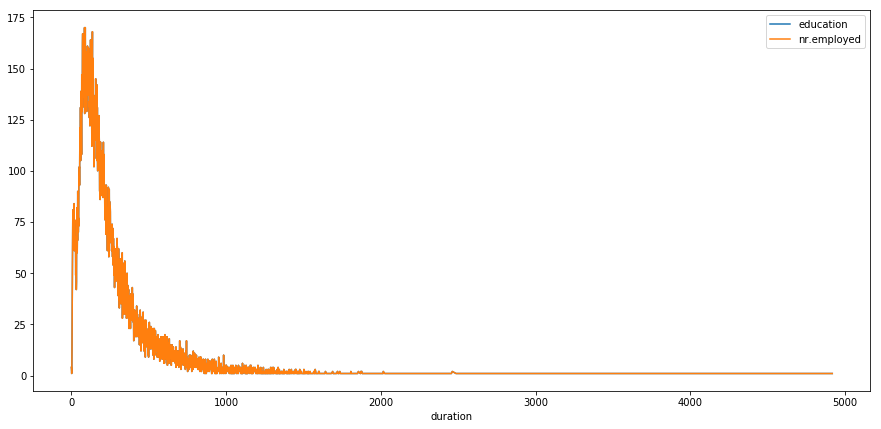

In [12]:
#plot data
fig, ax = plt.subplots(figsize=(15,7))
bank_additional_full_df.groupby(['duration']).count()[['education','nr.employed']].plot(ax=ax)

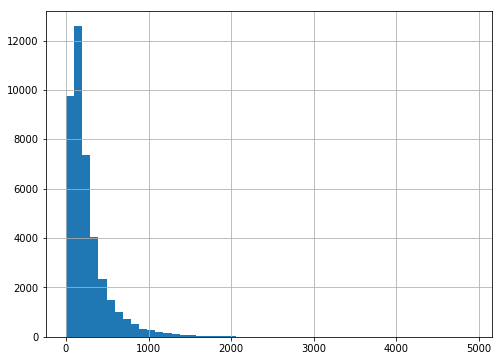

In [13]:
# Another way to plot a histogram of duration is shown below
bank_additional_full_df['duration'].hist(bins=50)

In [14]:
#Describing dummy keys of particular column
y_n_lookup ={'yes' : 1, 'no' : 0}
bank_additional_full_df['y_dummy'] = bank_additional_full_df['y'].map(lambda x: y_n_lookup[x])
bank_additional_full_df['y_dummy'].value_counts()

0    36548
1     4640
Name: y_dummy, dtype: int64

In [15]:
#getting marital status of groupby people
age_group_names = ['young', 'lower middle', 'middle', 'senior']
bank_additional_full_df['age_binned'] = pd.qcut(bank_additional_full_df['age'], 4, labels = age_group_names)
bank_additional_full_df['age_binned'].value_counts()
gb_marital_age = bank_additional_full_df['y_dummy'].groupby([bank_additional_full_df['marital'],bank_additional_full_df['age_binned']] ) 
gb_marital_age.mean()

marital   age_binned  
divorced  young           0.074148
          lower middle    0.093649
          middle          0.082001
          senior          0.134097
married   young           0.098465
          lower middle    0.092071
          middle          0.075517
          senior          0.135865
single    young           0.166407
          lower middle    0.117267
          middle          0.087753
          senior          0.108974
unknown   young           0.250000
          lower middle    0.041667
          middle          0.333333
          senior          0.115385
Name: y_dummy, dtype: float64

In [16]:
#unstack (Pivot a level of the (necessarily hierarchical) index labels) groupby marital status
gb_marital_age.mean().unstack()

age_binned,young,lower middle,middle,senior
marital,,,,
divorced,0.074148,0.093649,0.082001,0.134097
married,0.098465,0.092071,0.075517,0.135865
single,0.166407,0.117267,0.087753,0.108974
unknown,0.250000,0.041667,0.333333,0.115385


In [17]:
#getting life stage of age group
bank_additional_full_df['life_stage'] = bank_additional_full_df.apply(lambda x: x['age_binned'] +' & ' + x['marital'], axis = 1)
bank_additional_full_df['life_stage'].value_counts() 

senior & married           7478
middle & married           7111
young & single             6418
lower middle & married     6104
young & married            4235
lower middle & single      2942
senior & divorced          1745
middle & single            1584
middle & divorced          1439
lower middle & divorced     929
senior & single             624
young & divorced            499
senior & unknown             26
young & unknown              24
lower middle & unknown       24
middle & unknown              6
Name: life_stage, dtype: int64

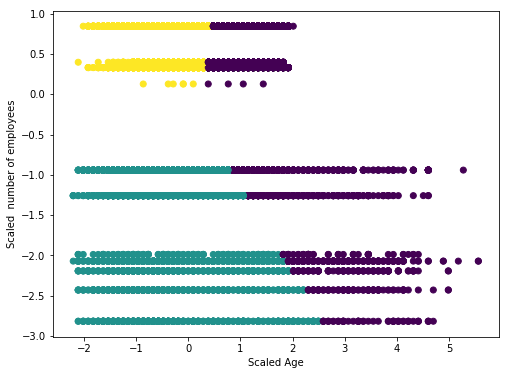

In [18]:
from sklearn import preprocessing
from sklearn import cluster
import matplotlib.pyplot as plt
#getting the pattern of particular age range employee
combined_data = bank_additional_full_df[['age','nr.employed']].as_matrix()
combined_data_scaled = preprocessing.scale(combined_data)

# Applying KMeans algorithm
kmeans = cluster.KMeans(n_clusters = 3)
kmeans.fit(combined_data_scaled)
y_pred = kmeans.predict(combined_data_scaled)
#Plotting the graph
plt.scatter(combined_data_scaled[:, 0], combined_data_scaled[:, 1], c = y_pred)
plt.xlabel('Scaled Age')
plt.ylabel('Scaled  number of employees')
plt.show()

#### Categorical graph plot using plotly

In [19]:
#Consider some important features
feature_col=['job', 'marital', 'education', 'default', 'housing', 'loan',
             'contact', 'month', 'day_of_week','previous', 'poutcome']

In [20]:
#importing the packeges
from IPython.core.interactiveshell import InteractiveShell     #An enhanced, interactive shell for Python
#‘all’, ‘last’, ‘last_expr’ or ‘none’, ‘last_expr_or_assign’
#specifying which nodes should be run interactively 
import plotly 
plotly.tools.set_credentials_file(username='KunalBhashkar', api_key='3ImJpD57ThNbPx117FsM')
InteractiveShell.ast_node_interactivity = "all"   #Options:	'all','last','last_expr','none','last_expr_or_assign'

import numpy as np # linear algebra
import pandas as pd # data processing

#Plotly Offline brings interactive Plotly graphs to the offline (local) environment
import plotly.offline as py
import plotly.figure_factory as ff
import plotly.graph_objs as gobj
import plotly.plotly as plty
from plotly.graph_objs import *
py.init_notebook_mode(connected=True)  # initiate notebook for offline plot

In [21]:
#Method for plotting 

def plot_value_counts(col_name,table=False,bar=False):
    
    values_count = pd.DataFrame(bank_additional_full_df[col_name].value_counts())
    values_count.columns = ['count']
   
    # Converting the index column into value count
    values_count[col_name] = [ str(i) for i in values_count.index ]
    
    # add a column with the percentage of each data point to the sum of all data points
    values_count['percent'] = values_count['count'].div(values_count['count'].sum()).multiply(100).round(2)
    
    # change the order of the columns.
    values_count = values_count.reindex([col_name,'count','percent'],axis=1)
    values_count.reset_index(drop=True,inplace=True)    
    
    if bar :
        # add a font size for annotations0 which is relevant to the length of the data points.
        font_size = 20 - (.25 * len(values_count[col_name]))
        
        trace0 = gobj.Bar( x = values_count[col_name], y = values_count['count'] )
        data_ = gobj.Data( [trace0] )
        
        annotations0 = [ dict(x = xi,
                             y = yi, 
                             showarrow=False,
                             font={'size':font_size},
                             text = "{:,}".format(yi),
                             xanchor='center',
                             yanchor='bottom' )
                       for xi,yi,_ in values_count.values ]
        
        annotations1 = [ dict( x = xi,
                              y = yi/2,
                              showarrow = False,
                              text = "{}%".format(pi),
                              xanchor = 'center',
                              yanchor = 'center',
                              font = {'color':'yellow'})
                         for xi,yi,pi in values_count.values if pi > 10 ]
        
        annotations = annotations0 + annotations1                       
        
        layout = gobj.Layout( title = col_name.replace('_',' ').capitalize(),
                             titlefont = {'size': 50},
                             yaxis = {'title':'count'},
                             xaxis = {'type':'category'},
                            annotations = annotations  )
        figure = gobj.Figure( data = data_, layout = layout )
        py.iplot(figure)
    
    if table : 
        values_count['count'] = values_count['count'].apply(lambda d : "{:,}".format(d))
        table = ff.create_table(values_count,index_title="race")      #Creating the table for race
        py.iplot(table)
    
    return values_count

In [ ]:
for col in feature_col:
    _ = plot_value_counts(col,0,1)

#### Analysis of Bank additional file

In [23]:
#Columns information
bank_additional_df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [24]:
#size
bank_additional_df.shape

(4119, 21)

In [25]:
#Info
bank_additional_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
age               4119 non-null int64
job               4119 non-null object
marital           4119 non-null object
education         4119 non-null object
default           4119 non-null object
housing           4119 non-null object
loan              4119 non-null object
contact           4119 non-null object
month             4119 non-null object
day_of_week       4119 non-null object
duration          4119 non-null int64
campaign          4119 non-null int64
pdays             4119 non-null int64
previous          4119 non-null int64
poutcome          4119 non-null object
emp.var.rate      4119 non-null float64
cons.price.idx    4119 non-null float64
cons.conf.idx     4119 non-null float64
euribor3m         4119 non-null float64
nr.employed       4119 non-null float64
y                 4119 non-null object
dtypes: float64(5), int64(5), object(11)
memory usage: 675.9+ KB


In [26]:
#Describe
bank_additional_df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,40.113620,256.788055,2.537266,960.422190,0.190337,0.084972,93.579704,-40.499102,3.621356,5166.481695
std,10.313362,254.703736,2.568159,191.922786,0.541788,1.563114,0.579349,4.594578,1.733591,73.667904
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,317.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [27]:
#Getting first five rows
bank_additional_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [28]:
#Checking for null value
bank_additional_df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

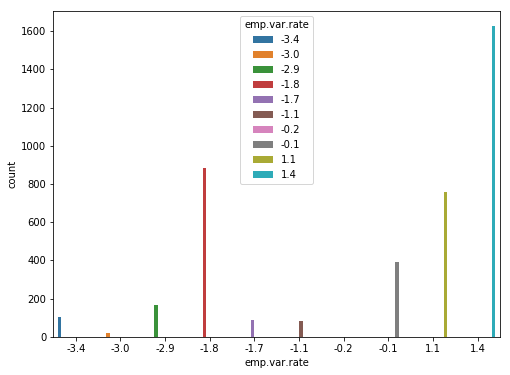

In [29]:
#plotting employment variation rate - quarterly indicator emp.var.rate
plt.rcParams['figure.figsize'] = (8, 6)
sns.countplot(x='emp.var.rate', hue='emp.var.rate', data=bank_additional_df);

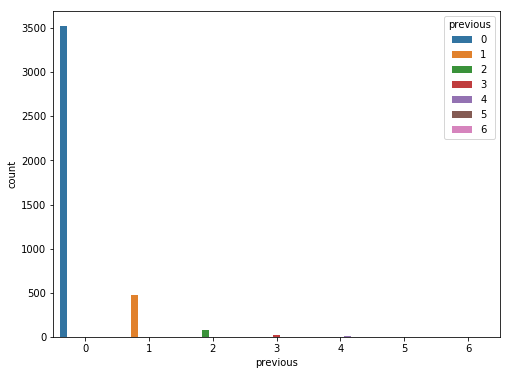

In [30]:
#previous: number of contacts performed before this campaign and for this client (numeric)
plt.rcParams['figure.figsize'] = (8, 6)
sns.countplot(x='previous',hue='previous',data=bank_additional_df);

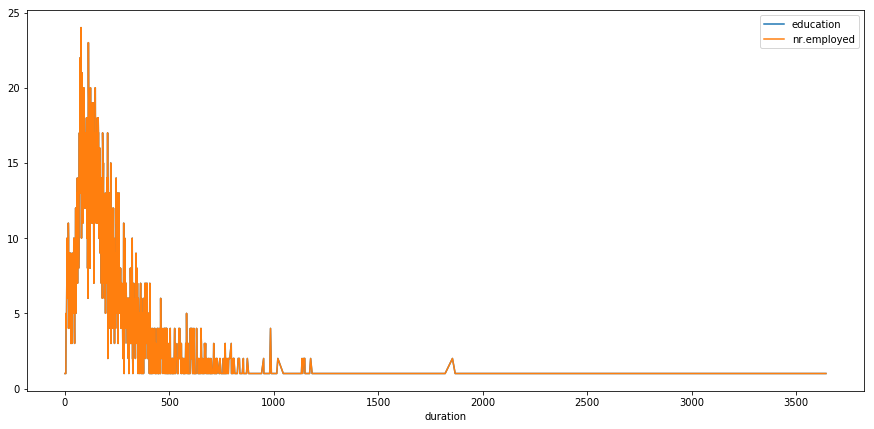

In [31]:
#plot data
fig, ax = plt.subplots(figsize=(15,7))
bank_additional_df.groupby(['duration']).count()[['education','nr.employed']].plot(ax=ax)

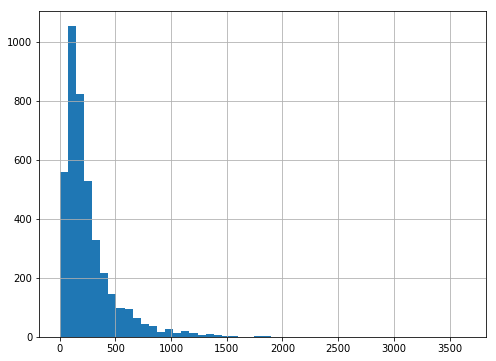

In [32]:
# Another way to plot a histogram of duration is shown below
bank_additional_df['duration'].hist(bins=50)

In [33]:
#Describing dummy keys of particular column
y_n_lookup ={'yes' : 1, 'no' : 0}
bank_additional_df['y_dummy'] = bank_additional_df['y'].map(lambda x: y_n_lookup[x])
bank_additional_df['y_dummy'].value_counts()

0    3668
1     451
Name: y_dummy, dtype: int64

In [34]:
#getting marital status of groupby people
age_group_names = ['young', 'lower middle', 'middle', 'senior']
bank_additional_df['age_binned'] = pd.qcut(bank_additional_df['age'], 4, labels = age_group_names)
gb_marital_age = bank_additional_df['y_dummy'].groupby([bank_additional_df['marital'],bank_additional_df['age_binned']] ) 
gb_marital_age.value_counts()

marital   age_binned    y_dummy
divorced  young         0           39
                        1            5
          lower middle  0           78
                        1            5
          middle        0          139
                        1           12
          senior        0          147
                        1           21
married   young         0          412
                        1           41
          lower middle  0          540
                        1           45
          middle        0          643
                        1           50
          senior        0          662
                        1          116
single    young         0          544
                        1           92
          lower middle  0          263
                        1           35
          middle        0          146
                        1           20
          senior        0           45
                        1            8
unknown   young         0       

In [35]:
#unstack (Pivot a level of the (necessarily hierarchical) index labels) groupby marital status
gb_marital_age.mean().unstack()

age_binned,young,lower middle,middle,senior
marital,,,,
divorced,0.113636,0.060241,0.079470,0.125000
married,0.090508,0.076923,0.072150,0.149100
single,0.144654,0.117450,0.120482,0.150943
unknown,0.000000,0.200000,NaN,0.000000


In [36]:
#getting life stage of age group
bank_additional_df['life_stage'] = bank_additional_df.apply(lambda x: x['age_binned'] +' & ' + x['marital'], axis = 1)
bank_additional_df['life_stage'].value_counts()

senior & married           778
middle & married           693
young & single             636
lower middle & married     585
young & married            453
lower middle & single      298
senior & divorced          168
middle & single            166
middle & divorced          151
lower middle & divorced     83
senior & single             53
young & divorced            44
lower middle & unknown       5
senior & unknown             4
young & unknown              2
Name: life_stage, dtype: int64

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

Text(0.5,0,'Scaled Age')

Text(0,0.5,'Scaled  number of employees')

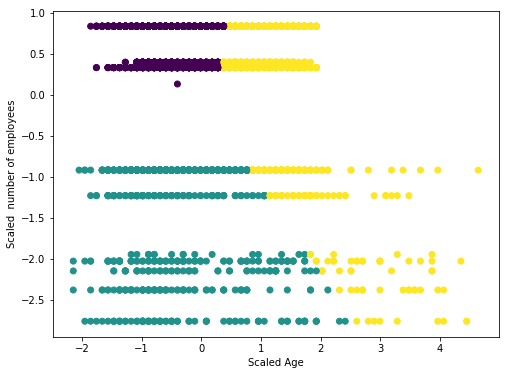

In [37]:
from sklearn import preprocessing
from sklearn import cluster
import matplotlib.pyplot as plt
#getting the pattern of particular age range employee
combined_data = bank_additional_df[['age','nr.employed']].as_matrix()
combined_data_scaled = preprocessing.scale(combined_data)

# Applying KMeans algorithm
kmeans = cluster.KMeans(n_clusters = 3)
kmeans.fit(combined_data_scaled)
y_pred = kmeans.predict(combined_data_scaled)
#Plotting the graph
plt.scatter(combined_data_scaled[:, 0], combined_data_scaled[:, 1], c = y_pred)
plt.xlabel('Scaled Age')
plt.ylabel('Scaled  number of employees')
plt.show()


In [38]:
#Consider some important features
feature_col=['job', 'marital', 'education', 'default', 'housing', 'loan',
             'contact', 'month', 'day_of_week','previous', 'poutcome']

In [39]:
#importing the packeges
from IPython.core.interactiveshell import InteractiveShell     #An enhanced, interactive shell for Python
#‘all’, ‘last’, ‘last_expr’ or ‘none’, ‘last_expr_or_assign’
#specifying which nodes should be run interactively 
import plotly 
plotly.tools.set_credentials_file(username='KunalBhashkar', api_key='3ImJpD57ThNbPx117FsM')
InteractiveShell.ast_node_interactivity = "all"   #Options:	'all','last','last_expr','none','last_expr_or_assign'

import numpy as np # linear algebra
import pandas as pd # data processing

#Plotly Offline brings interactive Plotly graphs to the offline (local) environment
import plotly.offline as py
import plotly.figure_factory as ff
import plotly.graph_objs as gobj
import plotly.plotly as plty
from plotly.graph_objs import *
py.init_notebook_mode(connected=True)  # initiate notebook for offline plot

In [40]:
#Method for plotting 

def plot_value_counts(col_name,table=False,bar=False):
    
    values_count = pd.DataFrame(bank_additional_df[col_name].value_counts())
    values_count.columns = ['count']
   
    # Converting the index column into value count
    values_count[col_name] = [ str(i) for i in values_count.index ]
    
    # add a column with the percentage of each data point to the sum of all data points
    values_count['percent'] = values_count['count'].div(values_count['count'].sum()).multiply(100).round(2)
    
    # change the order of the columns.
    values_count = values_count.reindex([col_name,'count','percent'],axis=1)
    values_count.reset_index(drop=True,inplace=True)    
    
    if bar :
        # add a font size for annotations0 which is relevant to the length of the data points.
        font_size = 20 - (.25 * len(values_count[col_name]))
        
        trace0 = gobj.Bar( x = values_count[col_name], y = values_count['count'] )
        data_ = gobj.Data( [trace0] )
        
        annotations0 = [ dict(x = xi,
                             y = yi, 
                             showarrow=False,
                             font={'size':font_size},
                             text = "{:,}".format(yi),
                             xanchor='center',
                             yanchor='bottom' )
                       for xi,yi,_ in values_count.values ]
        
        annotations1 = [ dict( x = xi,
                              y = yi/2,
                              showarrow = False,
                              text = "{}%".format(pi),
                              xanchor = 'center',
                              yanchor = 'center',
                              font = {'color':'yellow'})
                         for xi,yi,pi in values_count.values if pi > 10 ]
        
        annotations = annotations0 + annotations1                       
        
        layout = gobj.Layout( title = col_name.replace('_',' ').capitalize(),
                             titlefont = {'size': 50},
                             yaxis = {'title':'count'},
                             xaxis = {'type':'category'},
                            annotations = annotations  )
        figure = gobj.Figure( data = data_, layout = layout)
        py.iplot(figure)
    
    if table : 
        values_count['count'] = values_count['count'].apply(lambda d : "{:,}".format(d))
        table = ff.create_table(values_count,index_title="race")      #Creating the table for race
        py.iplot(table)
    
    return values_count

In [ ]:
for col in feature_col:
    _ = plot_value_counts(col,0,1)

#### Analysis for bank full file

In [42]:
#Columns information
bank_full_df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [43]:
#size
bank_full_df.shape

(45211, 17)

In [44]:
#Info
bank_full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [45]:
#Describe
bank_full_df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [46]:
#Getting first five rows
bank_full_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [47]:
#Checking for null value
bank_full_df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

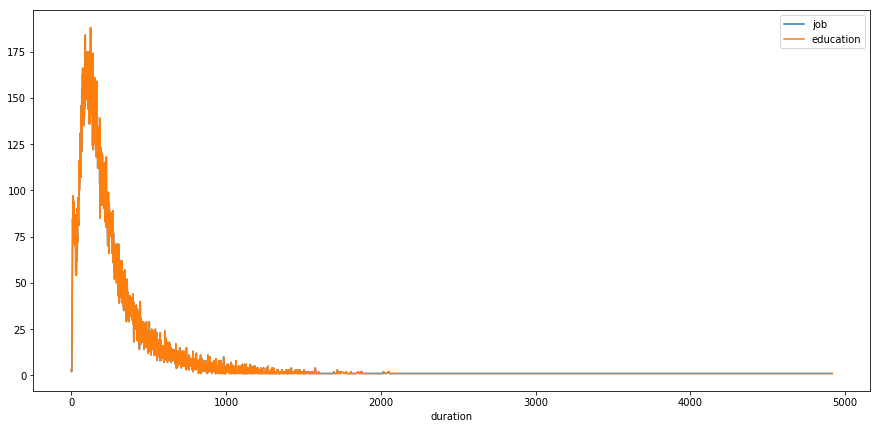

In [48]:
#plot data
fig, ax = plt.subplots(figsize=(15,7))
bank_full_df.groupby(['duration']).count()[['job','education']].plot(ax=ax)

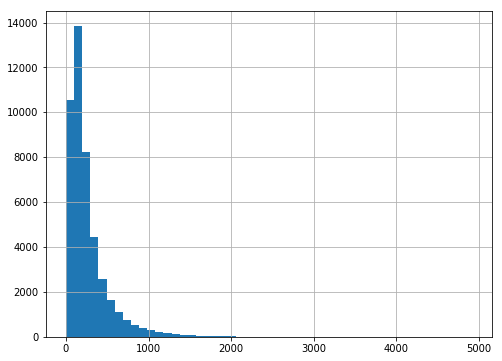

In [49]:
# Another way to plot a histogram of duration is shown below
bank_full_df['duration'].hist(bins=50)

In [50]:
#Describing dummy keys of particular column
y_n_lookup ={'yes' : 1, 'no' : 0}
bank_full_df['y_dummy'] = bank_full_df['y'].map(lambda x: y_n_lookup[x])
bank_full_df['y_dummy'].value_counts()

0    39922
1     5289
Name: y_dummy, dtype: int64

In [51]:
#getting marital status of groupby people
age_group_names = ['young', 'lower middle', 'middle', 'senior']
bank_full_df['age_binned'] = pd.qcut(bank_full_df['age'], 4, labels = age_group_names)
gb_marital_age = bank_full_df['y_dummy'].groupby([bank_full_df['marital'],bank_full_df['age_binned']] ) 
gb_marital_age.value_counts()

marital   age_binned    y_dummy
divorced  young         0           497
                        1            59
          lower middle  0           935
                        1           110
          middle        0          1424
                        1           159
          senior        0          1729
                        1           294
married   young         0          4578
                        1           446
          lower middle  0          5632
                        1           590
          middle        0          6902
                        1           607
          senior        0          7347
                        1          1112
single    young         0          6226
                        1          1277
          lower middle  0          2653
                        1           359
          middle        0          1373
                        1           196
          senior        0           626
                        1            80
Name: y_

In [52]:
#unstack (Pivot a level of the (necessarily hierarchical) index labels) groupby marital status
gb_marital_age.mean().unstack()

age_binned,young,lower middle,middle,senior
marital,,,,
divorced,0.106115,0.105263,0.100442,0.145329
married,0.088774,0.094825,0.080836,0.131458
single,0.170199,0.119190,0.124920,0.113314


In [53]:
#getting life stage of age group
bank_full_df['life_stage'] = bank_full_df.apply(lambda x: x['age_binned'] +' & ' + x['marital'], axis = 1)
bank_full_df['life_stage'].value_counts() 

senior & married           8459
middle & married           7509
young & single             7503
lower middle & married     6222
young & married            5024
lower middle & single      3012
senior & divorced          2023
middle & divorced          1583
middle & single            1569
lower middle & divorced    1045
senior & single             706
young & divorced            556
Name: life_stage, dtype: int64

/home/kunal/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning:

Data with input dtype int64 was converted to float64 by the scale function.



KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

Text(0.5,0,'Scaled Age')

Text(0,0.5,'Scaled Balance')

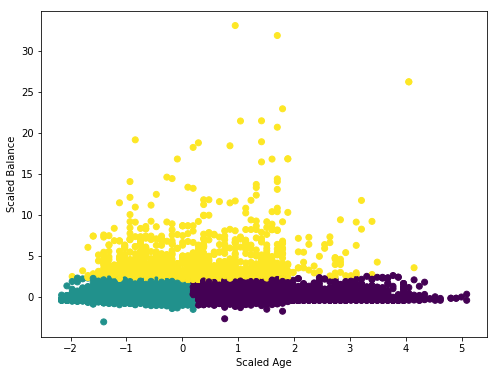

In [54]:
#Scale the data of age and balance
from sklearn import preprocessing
from sklearn import cluster
combined_data = bank_full_df[['age','balance']].as_matrix()
combined_data_scaled = preprocessing.scale(combined_data)
#Applying KMeans clustering for prediction
kmeans = cluster.KMeans(n_clusters = 3)
kmeans.fit(combined_data_scaled)
y_pred = kmeans.predict(combined_data_scaled)
#Plotting the age and balance
plt.scatter(combined_data_scaled[:, 0], combined_data_scaled[:, 1], c = y_pred)
plt.xlabel('Scaled Age')
plt.ylabel('Scaled Balance')
plt.show()

In [55]:
#Consider some important features
feature_col=['job', 'marital', 'education','default','balance','housing', 'loan',
             'contact', 'month','month','previous','poutcome']

In [56]:
#importing the packeges
from IPython.core.interactiveshell import InteractiveShell     #An enhanced, interactive shell for Python
#‘all’, ‘last’, ‘last_expr’ or ‘none’, ‘last_expr_or_assign’
#specifying which nodes should be run interactively 
import plotly 
plotly.tools.set_credentials_file(username='KunalBhashkar', api_key='3ImJpD57ThNbPx117FsM')
InteractiveShell.ast_node_interactivity = "all"   #Options:	'all','last','last_expr','none','last_expr_or_assign'

import numpy as np # linear algebra
import pandas as pd # data processing

#Plotly Offline brings interactive Plotly graphs to the offline (local) environment
import plotly.offline as py
import plotly.figure_factory as ff
import plotly.graph_objs as gobj
import plotly.plotly as plty
from plotly.graph_objs import *
py.init_notebook_mode(connected=True)  # initiate notebook for offline plot

In [57]:
#Method for plotting 

def plot_value_counts(col_name,table=False,bar=False):
    
    values_count = pd.DataFrame(bank_full_df[col_name].value_counts())
    values_count.columns = ['count']
   
    # Converting the index column into value count
    values_count[col_name] = [ str(i) for i in values_count.index ]
    
    # add a column with the percentage of each data point to the sum of all data points
    values_count['percent'] = values_count['count'].div(values_count['count'].sum()).multiply(100).round(2)
    
    # change the order of the columns.
    values_count = values_count.reindex([col_name,'count','percent'],axis=1)
    values_count.reset_index(drop=True,inplace=True)    
    
    if bar :
        # add a font size for annotations0 which is relevant to the length of the data points.
        font_size = 20 - (.25 * len(values_count[col_name]))
        
        trace0 = gobj.Bar( x = values_count[col_name], y = values_count['count'] )
        data_ = gobj.Data( [trace0] )
        
        annotations0 = [ dict(x = xi,
                             y = yi, 
                             showarrow=False,
                             font={'size':font_size},
                             text = "{:,}".format(yi),
                             xanchor='center',
                             yanchor='bottom' )
                       for xi,yi,_ in values_count.values ]
        
        annotations1 = [ dict( x = xi,
                              y = yi/2,
                              showarrow = False,
                              text = "{}%".format(pi),
                              xanchor = 'center',
                              yanchor = 'center',
                              font = {'color':'yellow'})
                         for xi,yi,pi in values_count.values if pi > 10 ]
        
        annotations = annotations0 + annotations1                       
        
        layout = gobj.Layout( title = col_name.replace('_',' ').capitalize(),
                             titlefont = {'size': 50},
                             yaxis = {'title':'count'},
                             xaxis = {'type':'category'},
                            annotations = annotations  )
        figure = gobj.Figure( data = data_, layout = layout )
        py.iplot(figure)
    
    if table : 
        values_count['count'] = values_count['count'].apply(lambda d : "{:,}".format(d))
        table = ff.create_table(values_count,index_title="race")      #Creating the table for race
        py.iplot(table)
    
    return values_count

In [ ]:
for col in feature_col:
    _ = plot_value_counts(col,0,1)

In [59]:
#Categorize the column of dataset which is object type 
for col in bank_full_df.columns:
    if bank_full_df[col].dtype == object:
        bank_full_df[col] = bank_full_df[col].astype('category')

In [60]:
#Convert categorical data into numerical value
bank_full_df["education"] = bank_full_df["education"].cat.codes

In [61]:
#Convert categorical data into numerical value
bank_full_df["job"] = bank_full_df["job"].cat.codes

In [62]:
bank_full_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,y_dummy,age_binned,life_stage
0,58,4,married,2,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,0,senior,senior & married
1,44,9,single,1,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,0,middle,middle & single
2,33,2,married,1,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,0,young,young & married
3,47,1,married,3,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,0,middle,middle & married
4,33,11,single,3,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,0,young,young & single


/home/kunal/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning:

Data with input dtype int8 was converted to float64 by the scale function.



KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

Text(0.5,0,'Scaled Job')

Text(0,0.5,'Scaled  Education')

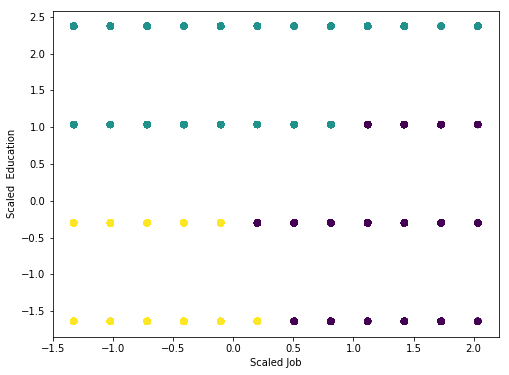

In [63]:
from sklearn import preprocessing
from sklearn import cluster
import matplotlib.pyplot as plt
#getting the pattern of particular age range employee
econ_data = bank_full_df[['job','education']].as_matrix()
econ_data_scaled = preprocessing.scale(econ_data)

# Applying KMeans algorithm
kmeans = cluster.KMeans(n_clusters = 3)
kmeans.fit(econ_data_scaled)
y_pred = kmeans.predict(econ_data_scaled)
#Plotting the graph
plt.scatter(econ_data_scaled[:, 0], econ_data_scaled[:, 1], c = y_pred)
plt.xlabel('Scaled Job')
plt.ylabel('Scaled  Education')
plt.show()

#### Analysis of Bank data

In [64]:
#Columns information
bank_df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [65]:
#size
bank_df.shape

(4521, 17)

In [66]:
#Info
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
age          4521 non-null int64
job          4521 non-null object
marital      4521 non-null object
education    4521 non-null object
default      4521 non-null object
balance      4521 non-null int64
housing      4521 non-null object
loan         4521 non-null object
contact      4521 non-null object
day          4521 non-null int64
month        4521 non-null object
duration     4521 non-null int64
campaign     4521 non-null int64
pdays        4521 non-null int64
previous     4521 non-null int64
poutcome     4521 non-null object
y            4521 non-null object
dtypes: int64(7), object(10)
memory usage: 600.5+ KB


In [67]:
#Describe
bank_df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [68]:
#Getting first five rows
bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [69]:
#Checking for null value
bank_df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

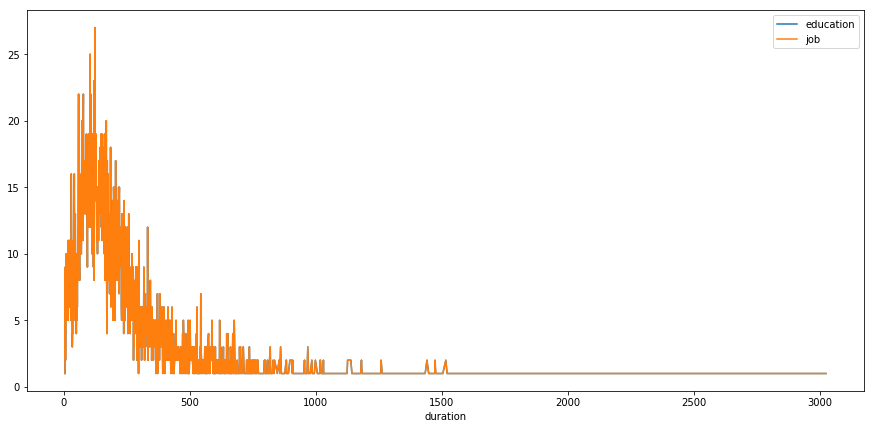

In [70]:
#plot data
fig, ax = plt.subplots(figsize=(15,7))
bank_df.groupby(['duration']).count()[['education','job']].plot(ax=ax)

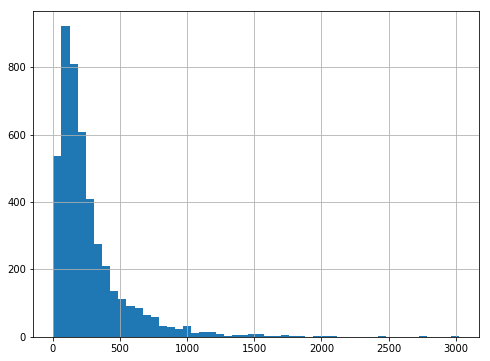

In [71]:
# Another way to plot a histogram of duration is shown below
bank_df['duration'].hist(bins=50)

In [72]:
#Describing dummy keys of particular column
y_n_lookup ={'yes' : 1, 'no' : 0}
bank_df['y_dummy'] = bank_df['y'].map(lambda x: y_n_lookup[x])
bank_df['y_dummy'].value_counts()

0    4000
1     521
Name: y_dummy, dtype: int64

In [73]:
#getting marital status of groupby people
age_group_names = ['young', 'lower middle', 'middle', 'senior']
bank_df['age_binned'] = pd.qcut(bank_df['age'], 4, labels = age_group_names)
gb_marital_age = bank_df['y_dummy'].groupby([bank_df['marital'],bank_df['age_binned']] ) 
gb_marital_age.value_counts()

marital   age_binned    y_dummy
divorced  young         0           54
                        1            6
          lower middle  0           91
                        1           15
          middle        0          155
                        1           22
          senior        0          151
                        1           34
married   young         0          451
                        1           46
          lower middle  0          594
                        1           61
          middle        0          781
                        1           73
          senior        0          694
                        1           97
single    young         0          584
                        1          100
          lower middle  0          257
                        1           31
          middle        0          144
                        1           28
          senior        0           44
                        1            8
Name: y_dummy, dtype: int64

In [74]:
#unstack (Pivot a level of the (necessarily hierarchical) index labels) groupby marital status
gb_marital_age.mean().unstack()

age_binned,young,lower middle,middle,senior
marital,,,,
divorced,0.100000,0.141509,0.124294,0.183784
married,0.092555,0.093130,0.085480,0.122630
single,0.146199,0.107639,0.162791,0.153846


In [75]:
#getting life stage of age group
bank_df['life_stage'] = bank_df.apply(lambda x: x['age_binned'] +' & ' + x['marital'], axis = 1)
bank_df['life_stage'].value_counts() 

middle & married           854
senior & married           791
young & single             684
lower middle & married     655
young & married            497
lower middle & single      288
senior & divorced          185
middle & divorced          177
middle & single            172
lower middle & divorced    106
young & divorced            60
senior & single             52
Name: life_stage, dtype: int64

In [76]:
#Categorize the column of dataset which is object type 
for col in bank_df.columns:
    if bank_df[col].dtype == object:
        bank_df[col] = bank_df[col].astype('category')

In [77]:
#Convert categorical data into numerical value
bank_df["education"] = bank_df["education"].cat.codes

In [78]:
#Convert categorical data into numerical value
bank_df["job"] = bank_df["job"].cat.codes

/home/kunal/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning:

Data with input dtype int8 was converted to float64 by the scale function.



KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

Text(0.5,0,'Scaled Job')

Text(0,0.5,'Scaled  Education')

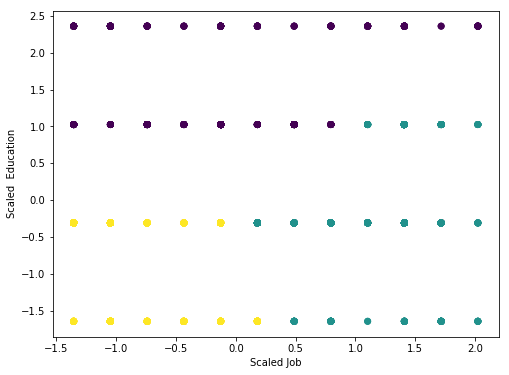

In [79]:
from sklearn import preprocessing
from sklearn import cluster
import matplotlib.pyplot as plt
#getting the pattern of particular age range employee
combined_data = bank_df[['job','education']].as_matrix()
combined_data_scaled = preprocessing.scale(combined_data)

# Applying KMeans algorithm
kmeans = cluster.KMeans(n_clusters = 3)
kmeans.fit(combined_data_scaled)
y_pred = kmeans.predict(combined_data_scaled)
#Plotting the graph
plt.scatter(combined_data_scaled[:, 0], combined_data_scaled[:, 1], c = y_pred)
plt.xlabel('Scaled Job')
plt.ylabel('Scaled  Education')
plt.show()

/home/kunal/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning:

Data with input dtype int64 was converted to float64 by the scale function.



KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

Text(0.5,0,'Scaled Age')

Text(0,0.5,'Scaled Balance')

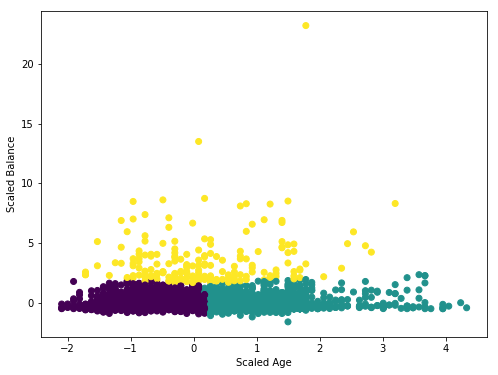

In [80]:
#Scale the data of age and balance
from sklearn import preprocessing
from sklearn import cluster
combined_data = bank_df[['age','balance']].as_matrix()
combined_data_scaled = preprocessing.scale(combined_data)
#Applying KMeans clustering for prediction
kmeans = cluster.KMeans(n_clusters = 3)
kmeans.fit(combined_data_scaled)
y_pred = kmeans.predict(combined_data_scaled)
#Plotting the age and balance
plt.scatter(combined_data_scaled[:, 0], combined_data_scaled[:, 1], c = y_pred)
plt.xlabel('Scaled Age')
plt.ylabel('Scaled Balance')
plt.show()

In [81]:
#Consider some important features
feature_col=['job', 'marital', 'education', 'default','balance','housing', 'loan',
             'contact', 'month', 'day','campaign', 'pdays','previous','poutcome']

In [82]:
#importing the packeges
from IPython.core.interactiveshell import InteractiveShell     #An enhanced, interactive shell for Python
#‘all’, ‘last’, ‘last_expr’ or ‘none’, ‘last_expr_or_assign’
#specifying which nodes should be run interactively 
import plotly 
plotly.tools.set_credentials_file(username='KunalBhashkar', api_key='3ImJpD57ThNbPx117FsM')
InteractiveShell.ast_node_interactivity = "all"   #Options:	'all','last','last_expr','none','last_expr_or_assign'

import numpy as np # linear algebra
import pandas as pd # data processing

#Plotly Offline brings interactive Plotly graphs to the offline (local) environment
import plotly.offline as py
import plotly.figure_factory as ff
import plotly.graph_objs as gobj
import plotly.plotly as plty
from plotly.graph_objs import *
py.init_notebook_mode(connected=True)  # initiate notebook for offline plot

In [83]:
#Method for plotting 

def plot_value_counts(col_name,table=False,bar=False):
    
    values_count = pd.DataFrame(bank_df[col_name].value_counts())
    values_count.columns = ['count']
   
    # Converting the index column into value count
    values_count[col_name] = [ str(i) for i in values_count.index ]
    
    # add a column with the percentage of each data point to the sum of all data points
    values_count['percent'] = values_count['count'].div(values_count['count'].sum()).multiply(100).round(2)
    
    # change the order of the columns.
    values_count = values_count.reindex([col_name,'count','percent'],axis=1)
    values_count.reset_index(drop=True,inplace=True)    
    
    if bar :
        # add a font size for annotations0 which is relevant to the length of the data points.
        font_size = 20 - (.25 * len(values_count[col_name]))
        
        trace0 = gobj.Bar( x = values_count[col_name], y = values_count['count'] )
        data_ = gobj.Data( [trace0] )
        
        annotations0 = [ dict(x = xi,
                             y = yi, 
                             showarrow=False,
                             font={'size':font_size},
                             text = "{:,}".format(yi),
                             xanchor='center',
                             yanchor='bottom' )
                       for xi,yi,_ in values_count.values ]
        
        annotations1 = [ dict( x = xi,
                              y = yi/2,
                              showarrow = False,
                              text = "{}%".format(pi),
                              xanchor = 'center',
                              yanchor = 'center',
                              font = {'color':'yellow'})
                         for xi,yi,pi in values_count.values if pi > 10 ]
        
        annotations = annotations0 + annotations1                       
        
        layout = gobj.Layout( title = col_name.replace('_',' ').capitalize(),
                             titlefont = {'size': 50},
                             yaxis = {'title':'count'},
                             xaxis = {'type':'category'},
                            annotations = annotations  )
        figure = gobj.Figure( data = data_, layout = layout )
        py.iplot(figure)
    
    if table : 
        values_count['count'] = values_count['count'].apply(lambda d : "{:,}".format(d))
        table = ff.create_table(values_count,index_title="race")      #Creating the table for race
        py.iplot(table)
    
    return values_count

In [ ]:
for col in feature_col:
    _ = plot_value_counts(col,0,1)

### Making Prediction using Bank Additional Full data Set

In [85]:
#Columns
bank_additional_full_df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'y_dummy',
       'age_binned', 'life_stage'],
      dtype='object')

In [86]:
#Taking only those column which will affect more to output
features_columns=['job','education', 'default', 'housing', 'loan',
           'month', 'day_of_week', 'duration', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m','y']

In [87]:
bank_additional_full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 24 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
y_dummy           41188 non-null int64
age_binned  

In [88]:
#Encode the categorical data
for col in bank_additional_full_df.columns:
    if bank_additional_full_df[col].dtype==object:
           bank_additional_full_df[col]=bank_additional_full_df[col].astype('category')
           bank_additional_full_df[col]=bank_additional_full_df[col].cat.codes

In [89]:
bank_additional_full_df[features_columns].head()

,job,education,default,housing,loan,month,day_of_week,duration,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,y
0,3,0,0,0,0,6,1,261,999,0,1,1.1,93.994,-36.4,4.857,0
1,7,3,1,0,0,6,1,149,999,0,1,1.1,93.994,-36.4,4.857,0
2,7,3,0,2,0,6,1,226,999,0,1,1.1,93.994,-36.4,4.857,0
3,0,1,0,0,0,6,1,151,999,0,1,1.1,93.994,-36.4,4.857,0
4,7,3,0,0,2,6,1,307,999,0,1,1.1,93.994,-36.4,4.857,0


In [90]:
# Rescale data (between 0 and 1)
import pandas
import scipy
import numpy
from sklearn.preprocessing import MinMaxScaler
features_columns_df=bank_additional_full_df[features_columns]
array = features_columns_df.values
# separate array into input and output components
X = array[:,0:15]
Y = array[:,15]
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX = scaler.fit_transform(X)
# summarize transformed data
numpy.set_printoptions(precision=3)
print(rescaledX[0:5,:])

[[0.273 0.    0.    0.    0.    0.667 0.25  0.053 1.    0.    0.5   0.938
  0.699 0.603 0.957]
 [0.636 0.429 0.5   0.    0.    0.667 0.25  0.03  1.    0.    0.5   0.938
  0.699 0.603 0.957]
 [0.636 0.429 0.    1.    0.    0.667 0.25  0.046 1.    0.    0.5   0.938
  0.699 0.603 0.957]
 [0.    0.143 0.    0.    0.    0.667 0.25  0.031 1.    0.    0.5   0.938
  0.699 0.603 0.957]
 [0.636 0.429 0.    0.    1.    0.667 0.25  0.062 1.    0.    0.5   0.938
  0.699 0.603 0.957]]


### Classify the model using RandomForestClassifier

In [124]:
# Random Forest Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
X = features_columns_df.iloc[:,0:15]
Y = features_columns_df.iloc[:,15]
# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
rf = RandomForestClassifier(random_state = 42)  # random_state is the seed used by the random number generator
#fitting the model
model = rf.fit(X_train, y_train)
# Find feature importance, print it
raw_feature_importance = model.feature_importances_.tolist()
feature_importance = [round(val * 100.0, 2) for val in raw_feature_importance]
print(zip(features_columns_df.columns, feature_importance))

In [125]:
#Getting the score of feature matrix and its target values 
model.score(X_test,y_test)

0.9068638269697639

#### Classification Report

In [126]:
from sklearn.metrics import classification_report
# Model Prediction 
predictions = model.predict(X_test)
#Print the classification report
print(classification_report(y_true =y_test,y_pred = predictions))
np.sum(predictions)

             precision    recall  f1-score   support

          0       0.94      0.96      0.95     12105
          1       0.60      0.46      0.52      1488

avg / total       0.90      0.91      0.90     13593



1136

(0.0, 1.0)

(0.0, 1.0)

Text(0.5,0,'False Positive Rate or (1 - Specifity)')

Text(0,0.5,'True Positive Rate or (Sensitivity)')

Text(0.5,1,'Receiver Operating Characteristic')

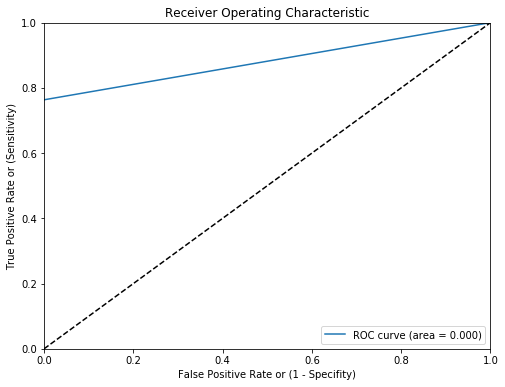

In [127]:
#ROC curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

y_true=sorted(y_test)
y_score=sorted(predictions)
# Compute fpr, tpr, thresholds and roc auc
fpr, tpr, thresholds = roc_curve(y_true, y_score)
roc_auc = auc(y_true, y_score)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

### Classify the model using XGBClassifier

In [128]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# split data into X and y
X = features_columns_df.iloc[:,0:15]
Y = features_columns_df.iloc[:,15]

In [129]:
# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

Accuracy: 91.50%


/home/kunal/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.



(0.0, 1.0)

(0.0, 1.0)

Text(0.5,0,'False Positive Rate or (1 - Specifity)')

Text(0,0.5,'True Positive Rate or (Sensitivity)')

Text(0.5,1,'Receiver Operating Characteristic')

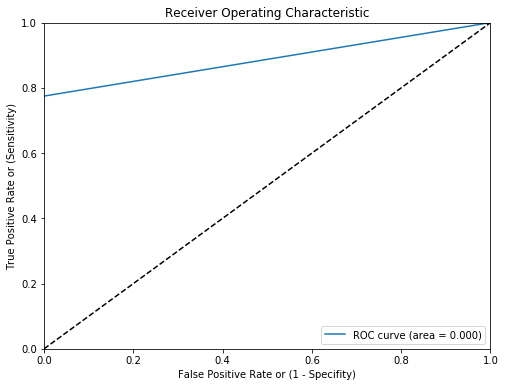

In [130]:
#ROC curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

y_true=sorted(y_test)
y_score=sorted(predictions)
# Compute fpr, tpr, thresholds and roc auc
fpr, tpr, thresholds = roc_curve(y_true, y_score)
roc_auc = auc(y_true, y_score)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

#### MLP Classifier

In [97]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# split data into X and y
X = features_columns_df.iloc[:,0:15]
Y = features_columns_df.iloc[:,15]
# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
mlp = MLPClassifier(hidden_layer_sizes=(13,13,13),max_iter=500)
mlp.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(13, 13, 13), learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [98]:
from sklearn.metrics import classification_report,confusion_matrix
predictions = mlp.predict(X_test)
#print the confusion matrix
print(confusion_matrix(y_test,predictions))

[[11811   294]
 [  965   523]]


In [99]:
#Print the classification report
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.92      0.98      0.95     12105
          1       0.64      0.35      0.45      1488

avg / total       0.89      0.91      0.90     13593



(0.0, 1.0)

(0.0, 1.0)

Text(0.5,0,'False Positive Rate or (1 - Specifity)')

Text(0,0.5,'True Positive Rate or (Sensitivity)')

Text(0.5,1,'Receiver Operating Characteristic')

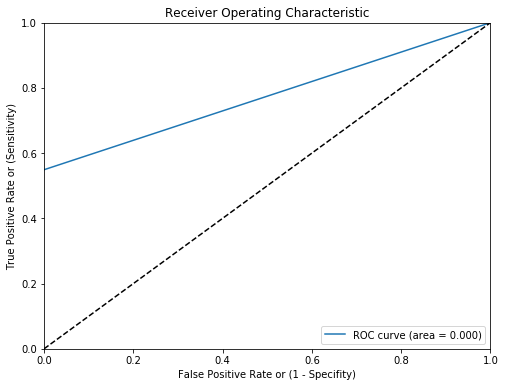

In [113]:
#ROC curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

y_true=sorted(y_test)
y_score=sorted(predictions)
# Compute fpr, tpr, thresholds and roc auc
fpr, tpr, thresholds = roc_curve(y_true, y_score)
roc_auc = auc(y_true, y_score)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

 LR : 0.895252 (0.113109)
 LDA : 0.900862 (0.091894)
 KNN : 0.894233 (0.100537)
 CART : 0.872260 (0.103545)
 NB : 0.849849 (0.141722)
 SVM : 0.886025 (0.121419)


Text(0.5,0.98,' Algorithm Comparison ')

{'boxes': [<matplotlib.lines.Line2D at 0x7f5128fed828>,
 'caps': [<matplotlib.lines.Line2D at 0x7f5128f10240>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f5128f10eb8>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f5128f10a90>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f5128f0d940>,
  <matplotlib.lines.Line2D at 0x7f5128edb1d0>]}

[Text(0,0,' LR '),
 Text(0,0,' LDA '),
 Text(0,0,' KNN '),
 Text(0,0,' CART '),
 Text(0,0,' NB '),
 Text(0,0,' SVM ')]

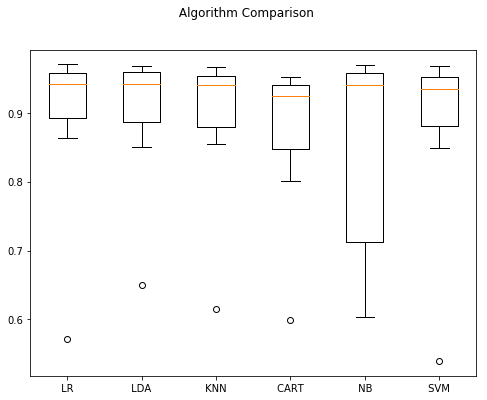

In [100]:
# Compare Algorithms
from pandas import read_csv
from matplotlib import pyplot
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
# split data into X and y
X = features_columns_df.iloc[:,0:15]
Y = features_columns_df.iloc[:,15]
# prepare models
models = []
models.append(( ' LR ' , LogisticRegression()))
models.append(( ' LDA ' , LinearDiscriminantAnalysis()))
models.append(( ' KNN ' , KNeighborsClassifier()))
models.append(( ' CART ' , DecisionTreeClassifier()))
models.append(( ' NB ' , GaussianNB()))
models.append(( ' SVM ' , SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = KFold(n_splits=10, random_state=7)
    cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle( ' Algorithm Comparison ' )
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()